In [1]:
import pandas as pd

data = pd.read_csv('Kochi_SO2.txt')


In [2]:
import numpy as np

In [3]:
df = data.drop(columns= 'date')
df

,open_SO2,sate_SO2,"Vyttila, Kochi - Kerala PCB"
0,6.215000,-0.030,6.98
1,2.563333,0.470,23.56
2,7.198333,-0.038,20.49
3,10.084167,0.070,16.57
4,10.718333,0.130,12.61
...,...,...,...
398,8.374583,-0.010,21.33
399,8.975417,0.114,21.20
400,9.517083,-0.390,19.62
401,11.864167,-0.132,19.36


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df

,open_SO2,sate_SO2,"Vyttila, Kochi - Kerala PCB"
0,0.378396,0.415094,0.243635
1,0.129072,0.650943,0.829915
2,0.445535,0.411321,0.721358
3,0.642571,0.462264,0.582744
4,0.685870,0.490566,0.442716
...,...,...,...
398,0.525846,0.424528,0.751061
399,0.566869,0.483019,0.746464
400,0.603852,0.245283,0.690594
401,0.764103,0.366981,0.681400


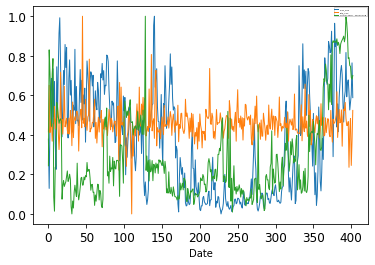

In [5]:
ax = df.plot(linewidth=1, fontsize=12);
ax.set_xlabel('Date');
ax.legend(fontsize=2);

In [6]:
y = df['open_SO2']
x = df.drop(columns =["open_SO2"])

In [7]:
df.describe()

,open_SO2,sate_SO2,"Vyttila, Kochi - Kerala PCB"
count,403.000000,403.000000,403.000000
mean,0.371378,0.460528,0.286697
std,0.263918,0.081414,0.224029
min,0.000000,0.000000,0.000000
25%,0.097451,0.418396,0.123232
50%,0.382777,0.457547,0.212871
75%,0.589414,0.490566,0.404703
max,1.000000,1.000000,1.000000


# Normal OLS

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression().fit(x,y)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.21464018020544776

In [9]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.11413283125586067

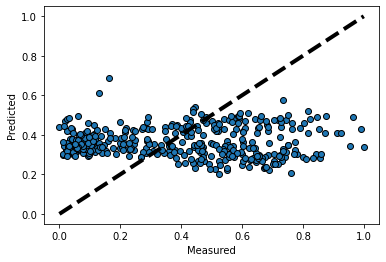

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# LASSO

In [11]:
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
model = linear_model.Lasso(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.23384338297903845

In [12]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.019400183028391815

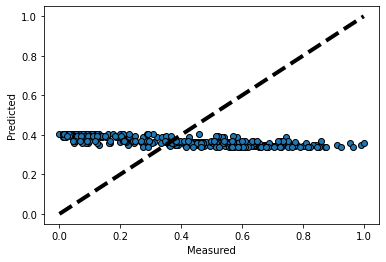

In [13]:


predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Ridge

In [14]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.21467609536671697

In [15]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.11377923686604166

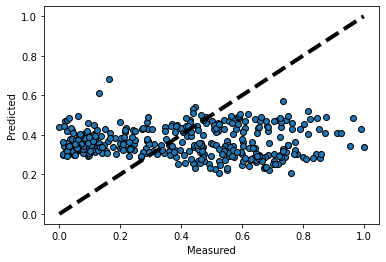

In [16]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Elastic Net

In [17]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.23384338297903845

In [18]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.019400183028391815

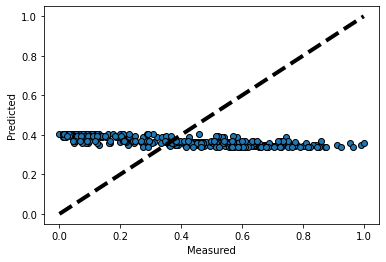

In [19]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

# Decision tree

In [20]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.28323263514267916

In [21]:
scores = cross_val_score(model, x, y, scoring='r2',
                         cv=cv, n_jobs=-1)
np.mean(np.absolute(scores))

0.8441049191677849

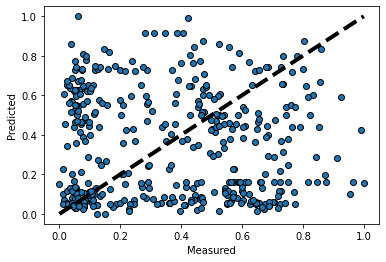

In [22]:

predicted = cross_val_predict(model, x, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [23]:
regr = tree.DecisionTreeRegressor()
model = regr.fit(x, y)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 0.49
|   |--- feature_1 <= 0.10
|   |   |--- feature_1 <= 0.05
|   |   |   |--- feature_1 <= 0.03
|   |   |   |   |--- feature_0 <= 0.51
|   |   |   |   |   |--- feature_0 <= 0.38
|   |   |   |   |   |   |--- value: [0.53]
|   |   |   |   |   |--- feature_0 >  0.38
|   |   |   |   |   |   |--- feature_1 <= 0.02
|   |   |   |   |   |   |   |--- feature_1 <= 0.01
|   |   |   |   |   |   |   |   |--- value: [0.01]
|   |   |   |   |   |   |   |--- feature_1 >  0.01
|   |   |   |   |   |   |   |   |--- value: [0.03]
|   |   |   |   |   |   |--- feature_1 >  0.02
|   |   |   |   |   |   |   |--- value: [0.05]
|   |   |   |   |--- feature_0 >  0.51
|   |   |   |   |   |--- value: [0.67]
|   |   |   |--- feature_1 >  0.03
|   |   |   |   |--- feature_0 <= 0.54
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- value: [0.55]
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |--- value: [0.

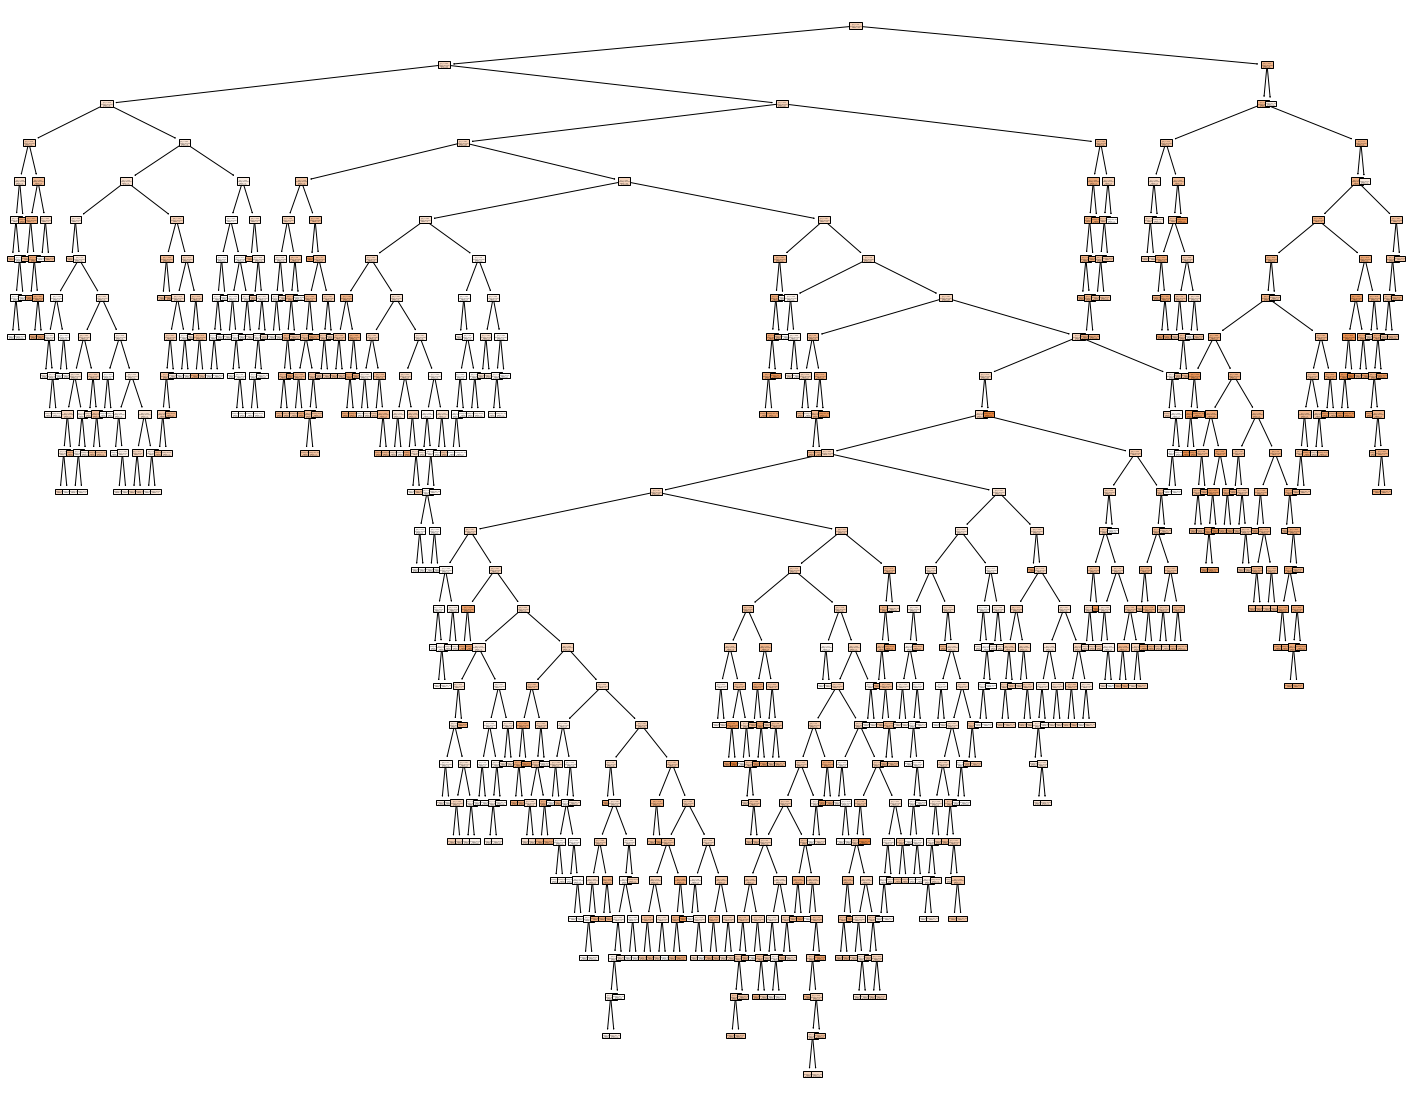

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)

In [25]:
import xgboost
model = xgboost.XGBRegressor()
fit_params={'early_stopping_rounds': 30, 
            'eval_metric': 'mae',
            'verbose': False,
            'eval_set': [[x, y]]}
scores = cross_val_score(model, x, y, 
                         cv = cv, 
                         scoring = 'neg_mean_absolute_error',
                         fit_params = fit_params)

np.mean(np.absolute(scores))

0.24395066570242702

In [26]:
scores = cross_val_score(model, x, y, 
                         cv = cv, 
                         scoring = 'r2',
                         fit_params = fit_params)

np.mean(np.absolute(scores))

0.3900230257090057